# 1 concat

用于将多个DataFrame沿指定的轴进行拼接

## 1.1 concat语法

pd.concat(objs,axis,ignore_index,keys,sort)

- objs:要合并的多个DataFrame对象,列表
- axis:0，沿竖直方向，拼接行，1，沿横向拼接列
- ignore_index:True，忽略原索引，此时不会保留分层索引；False保留原索引，False为默认值
- keys:为拼接后的结构添加层次化索引，区分数据来源

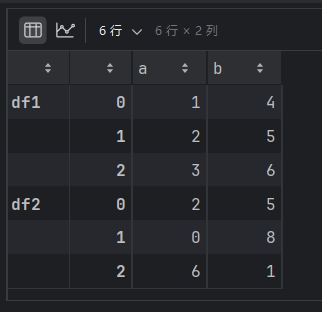
- sort:是否对列或索引排序，默认为False
- 如果拼接的两个对象列名不一样，会保留原来的列名，没有数据的地方添上NaN

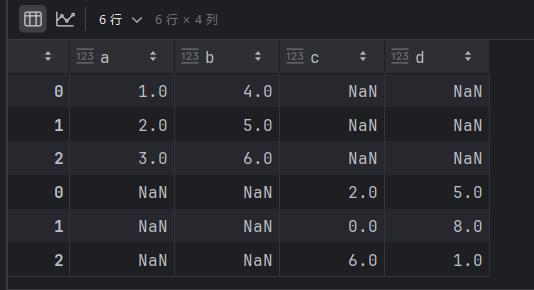

## 1.2 垂直拼接

In [8]:
import pandas as pd

df1 = pd.DataFrame({'a':[1,2,3],'b':[4,5,6]})
df2 = pd.DataFrame({'a':[2,0,6],'b':[5,8,1]})
df3 = pd.DataFrame({'c':[2,0,6],'d':[5,8,1]})
df1,df2

(   a  b
 0  1  4
 1  2  5
 2  3  6,
    a  b
 0  2  5
 1  0  8
 2  6  1)

In [20]:
con1 = pd.concat([df1,df2],axis=0,keys=['df1','df2'])
con1

a  b
df1 0  1  4
    1  2  5
    2  3  6
df2 0  2  5
    1  0  8
    2  6  1

## 1.3 水平拼接

In [18]:
con2 = pd.concat([df1,df2],axis=1,ignore_index=False,keys=['df1','df2'])
con2

df1    df2   
    a  b   a  b
0   1  4   2  5
1   2  5   0  8
2   3  6   6  1

## 1.4 keys添加层次化索引

In [ ]:
con2 = pd.concat([df1,df2],axis=1,ignore_index=False,keys=['df1','df2'])

## 1.5 重置索引

无法和Keys一起生效

In [19]:
con3 = pd.concat([df1,df2],axis=0,ignore_index=True)
con3

,a,b
0,1,4
1,2,5
2,3,6
3,2,5
4,0,8
5,6,1


# 2 merge

merge函数用于根据一个或多个列的数据值是否相同将两个DataFrame进行横向连接，包括内连接、外连接、左连接、右连接

## 2.1 语法

pd.merge(left,right,how,on,left_on,right_on)

- left、right:要合并的两个DateFrame
- how:连接方式
    - inner:默认值，取两个表的交集
    - outer:取两个表的并集，缺失值填充NaN
    - left:以左表为基准，保留左表所有行
    - right:以右表为基准，保留右表所有行
- on:主键，用于连接的列名,可用列表提供多个键
- left_on/right_on:分别指定左表和右表用作连接键的列

## 2.2 连接方式how

### 2.2.1 内连接

基于一个或多个键将两个表连接

- 内连接以左、右表的公共部分为基准，都存在的记录才会出现在最终结果中
- 如果记录只在其中一个出现则不会出现在最终结果中

In [23]:
df1 = pd.DataFrame(
    {'a':[3,5,1],
     'b':[2,0,1],
     'c':[2,0,6],}
)
df2 = pd.DataFrame(
    {'b':[3,5,1],
     'e':[4,5,6],
     'f':[2,0,6],}
)
df1,df2

(   a  b  c
 0  3  2  2
 1  5  0  0
 2  1  1  6,
    b  e  f
 0  3  4  2
 1  5  5  0
 2  1  6  6)

In [24]:
mer1 = pd.merge(df1,df2,how='inner',on='b')
mer1

,a,b,c,e,f
0,1,1,6,6,6



### 2.2.2 外连接

- 左右两个表的记录都会出现
- 左右匹配，出现在最终结果
- 如果只出现在一个表，另一个表对应的结果使用NaN填充

In [28]:
df1 = pd.DataFrame(
    {'a':[3,5,1],
     'b':[2,1,1],
     'c':[2,0,6],}
)
df2 = pd.DataFrame(
    {'b':[3,1,1],
     'e':[4,5,6],
     'f':[2,0,6],}
)

mer2 = pd.merge(df1,df2,how='outer',on='b')
mer2

,a,b,c,e,f
0,5.0,1,0.0,5.0,0.0
1,5.0,1,0.0,6.0,6.0
2,1.0,1,6.0,5.0,0.0
3,1.0,1,6.0,6.0,6.0
4,3.0,2,2.0,NaN,NaN
5,NaN,3,NaN,4.0,2.0



### 2.2.3 左连接

根据一个或多个值是否相同将两个表连接起来

- 以左表为基准，左表记录会全部出现，右表中有匹配左表的记录则出现在最终结果中
- 在左表出现但在右表不出现，右表对应位置填充NaN
- 左表不出现但在右表出现，删除

In [25]:
df1 = pd.DataFrame(
    {'a':[3,5,1],
     'b':[2,0,1],
     'c':[2,0,6],}
)
df2 = pd.DataFrame(
    {'b':[3,5,1],
     'e':[4,5,6],
     'f':[2,0,6],}
)
mer3 = pd.merge(df1,df2,how='left',left_on='a',right_on='e')
mer3

,a,b_x,c,b_y,e,f
0,3,2,2,NaN,NaN,NaN
1,5,0,0,5.0,5.0,0.0
2,1,1,6,NaN,NaN,NaN



### 2.2.4 右连接

根据一个或多个值是否相同将两个表连接起来

- 以右表为基准，右表记录会全部出现，左表中有匹配右表的记录则出现在最终结果中
- 在右表出现但在左表不出现，右表对应位置填充NaN
- 右表不出现但在左表出现，删除

In [27]:
df1 = pd.DataFrame(
    {'a':[3,5,1],
     'b':[2,0,1],
     'c':[2,0,6],}
)
df2 = pd.DataFrame(
    {'b':[3,5,1],
     'e':[4,5,6],
     'f':[2,0,6],}
)
mer4 = pd.merge(df1,df2,how='right',left_on='b',right_on='f')
mer4

,a,b_x,c,b_y,e,f
0,3.0,2.0,2.0,3,4,2
1,5.0,0.0,0.0,5,5,0
2,NaN,NaN,NaN,1,6,6


## 2.3 连接主键

两个表连接时指定的用于连接的公共列

### 2.3.1 on为单列

- on要求两个表的列名相同
- 可以为单列也可是多列，多列用[]包裹

In [36]:
df1 = pd.DataFrame(
    {'ID':[1,5,3,9],
     'City':['New York','Los Angeles','Houston','Phoenix'],
     'Name':['Alice','Bob','Clina','David']}
)
df2 = pd.DataFrame(
    {'ID':[1,2,3,7],
     'City':['New York','Los Angeles','Chicago','Phoenix'],
     'Score':[80,90,100,99]}
)
mer5 = pd.merge(df1,df2,how='inner',on='ID')
mer5

,ID,City_x,Name,City_y,Score
0,1,New York,Alice,New York,80
1,3,Houston,Clina,Chicago,100


### 2.3.2 on为多列

必须多列组成的组同时匹配才行，

In [37]:
mer6 = pd.merge(df1,df2,how='inner',on=['ID','City'])
mer6

,ID,City,Name,Score
0,1,New York,Alice,80


### 2.3.3 left_on/right_on

左右表连接的列名不相同可以使用,可以分别指定多列，放在列表中

In [39]:
df1 = pd.DataFrame(
    {'ID':[1,5,3,9],
     'City':['New York','Los Angeles','Houston','Phoenix'],
     'Name':['Alice','Bob','Clina','David']}
)
df2 = pd.DataFrame(
    {'ID':[1,2,3,7],
     'City':['New York','Los Angeles','Chicago','Phoenix'],
     'Score':[80,9,100,99]}
)
mer7 = pd.merge(df1,df2,how='inner',left_on='ID',right_on='Score')
mer7

,ID_x,City_x,Name,ID_y,City_y,Score
0,9,Phoenix,David,2,Los Angeles,9
